In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [15]:
airline= pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\EXCELR\Assignments\Clustering\EastWestAirlines.csv")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [13]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [16]:
airline.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
airline

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [18]:
airline.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [19]:
airline.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

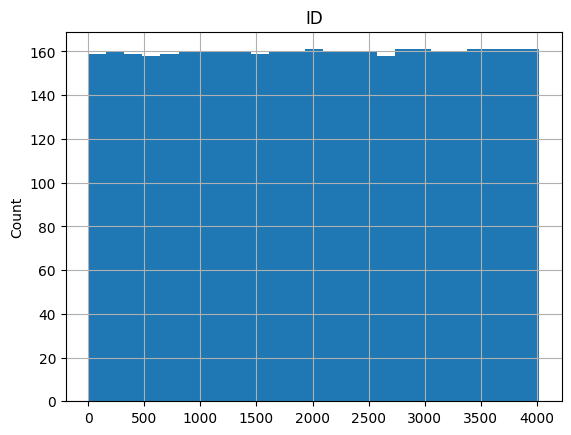

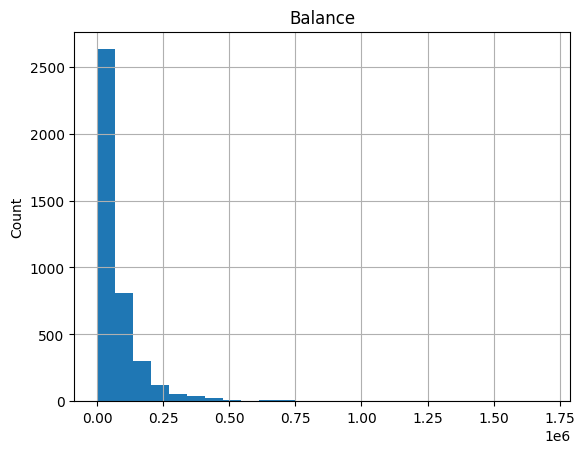

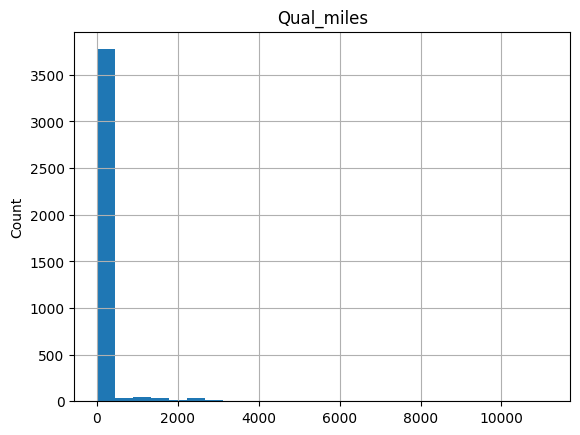

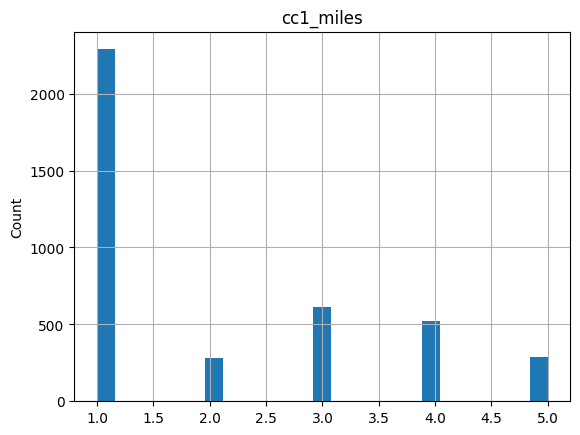

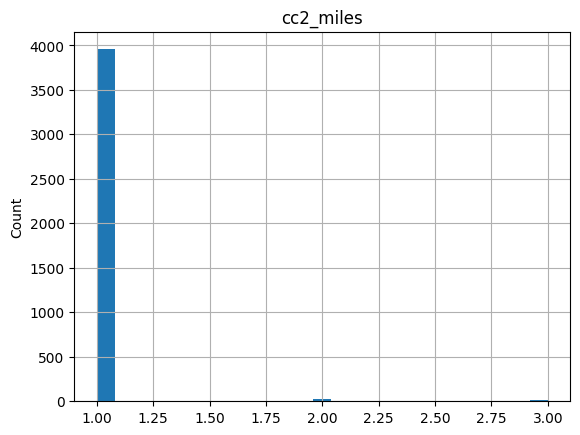

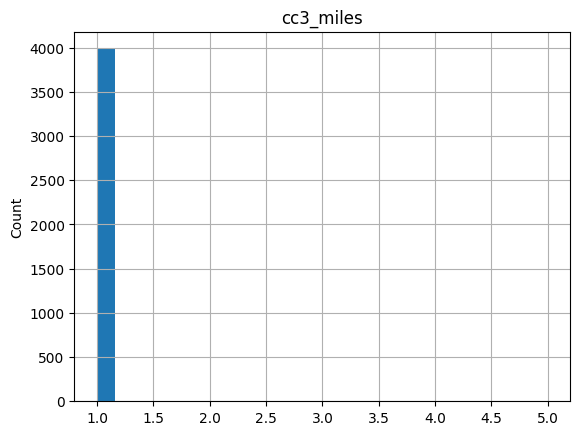

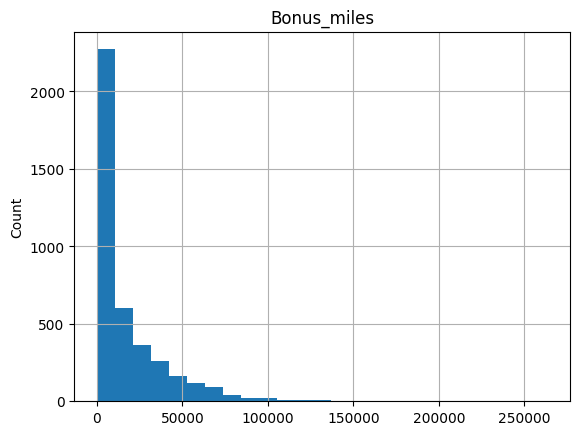

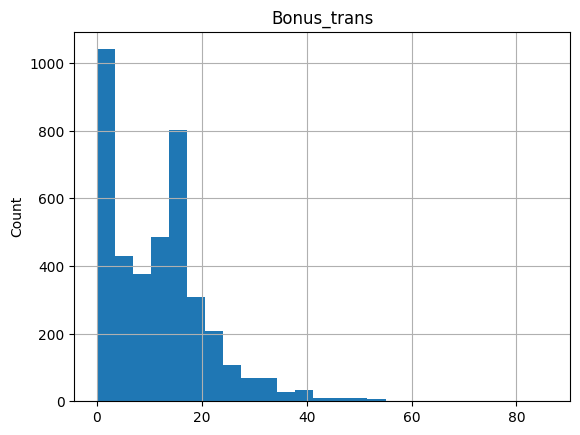

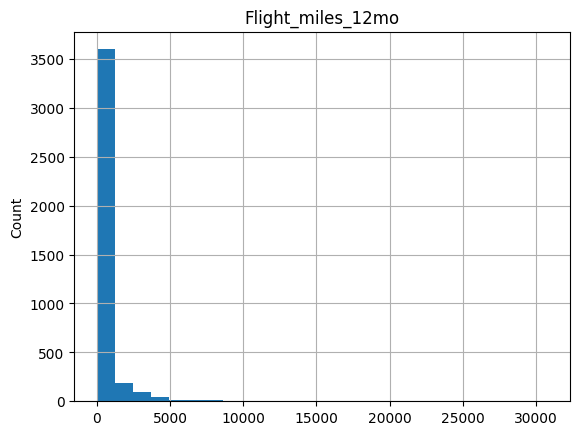

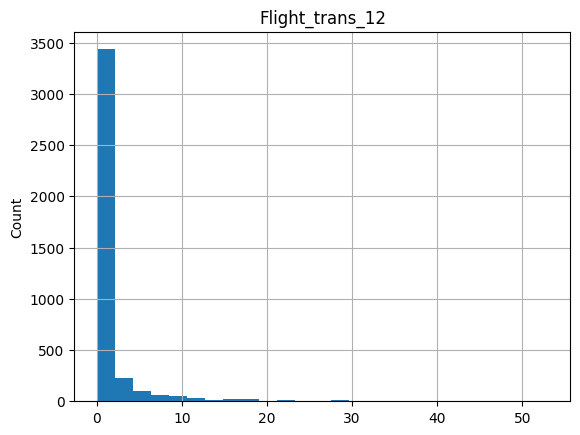

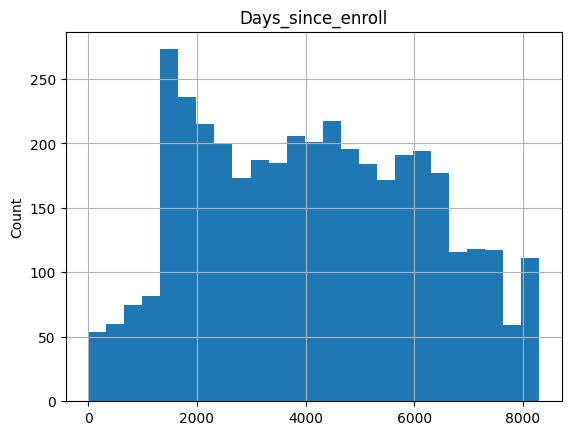

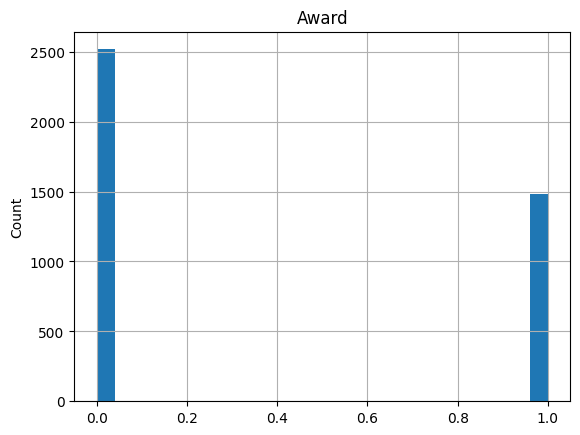

In [23]:
for feature in airline.columns:
    airline=airline.copy()
    airline[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

ID


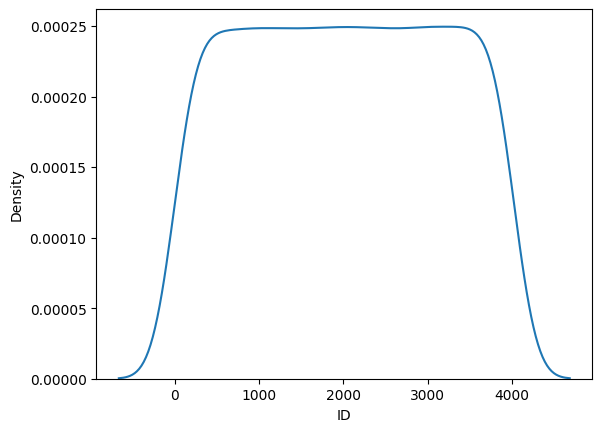

Balance


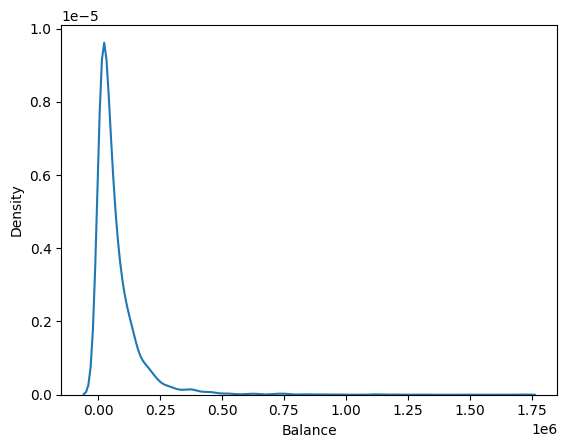

Qual_miles


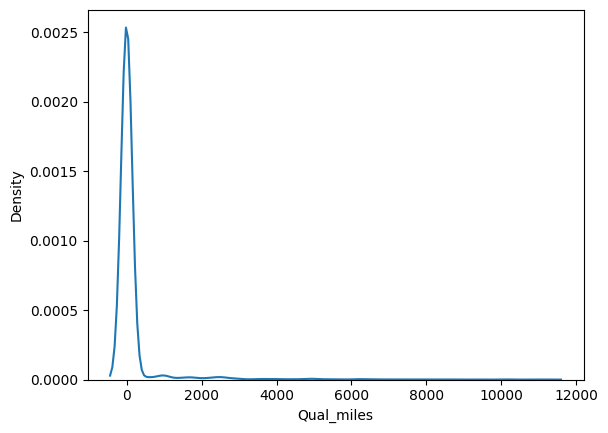

cc1_miles


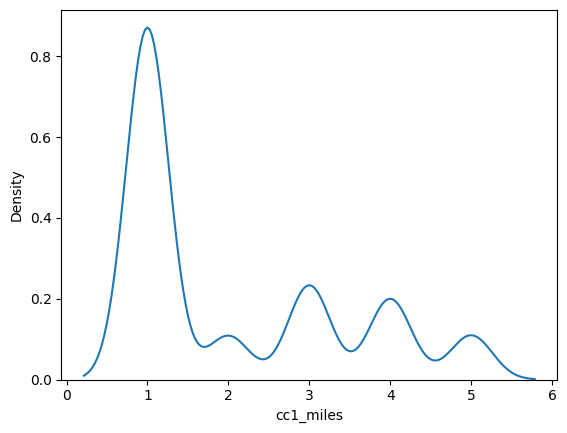

cc2_miles


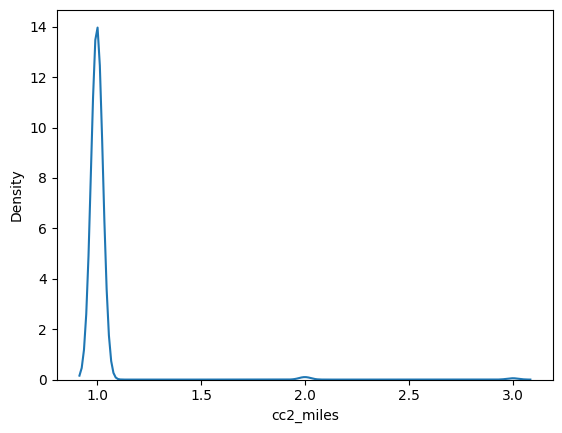

cc3_miles


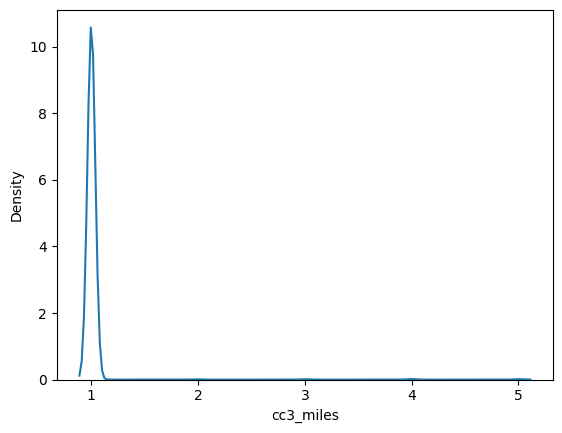

Bonus_miles


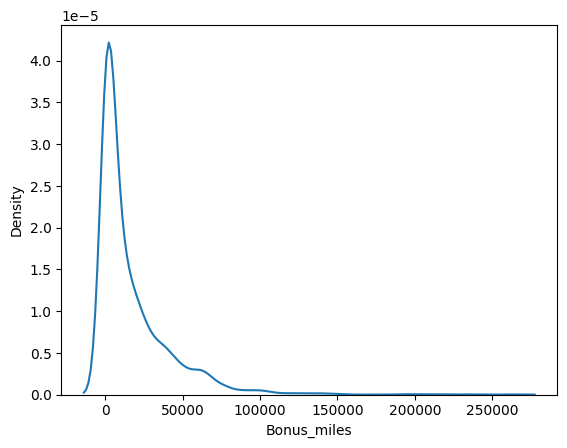

Bonus_trans


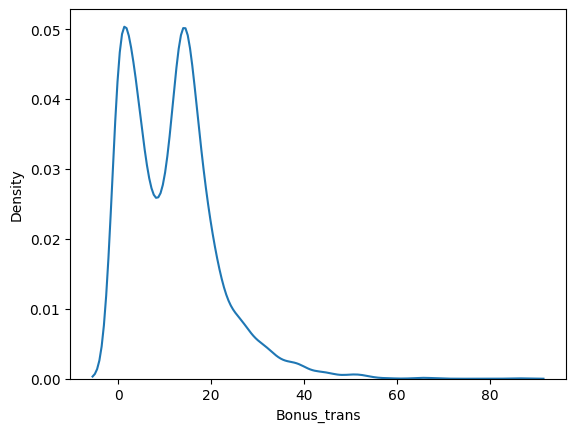

Flight_miles_12mo


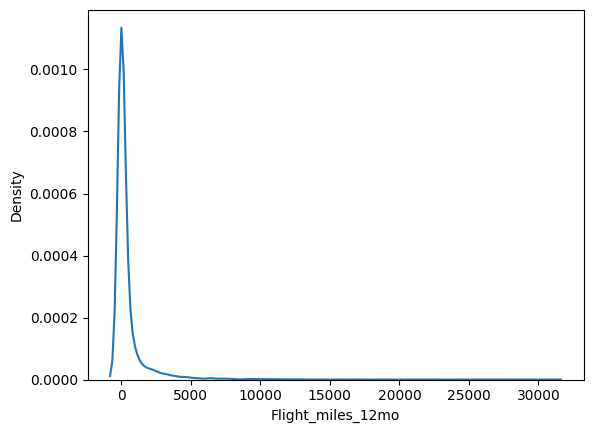

Flight_trans_12


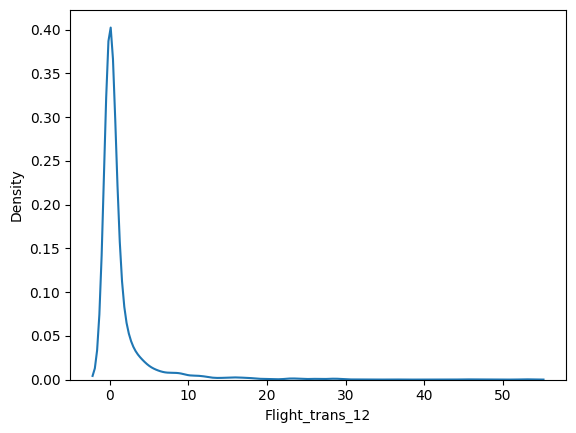

Days_since_enroll


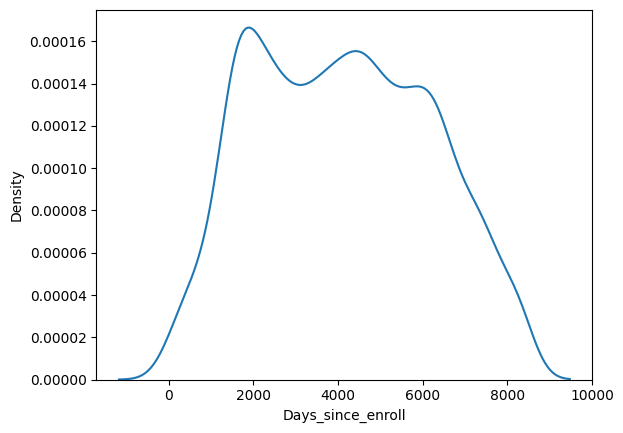

Award


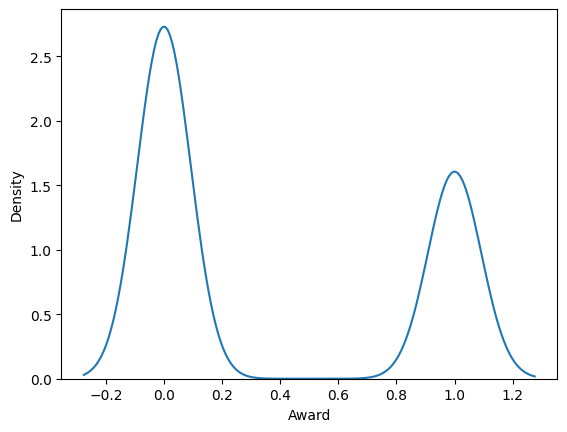

In [26]:
for n in airline.columns:
    print(n)
    sns.kdeplot(airline[n])
    plt.show()

In [27]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [29]:
airline.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [30]:
airline.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

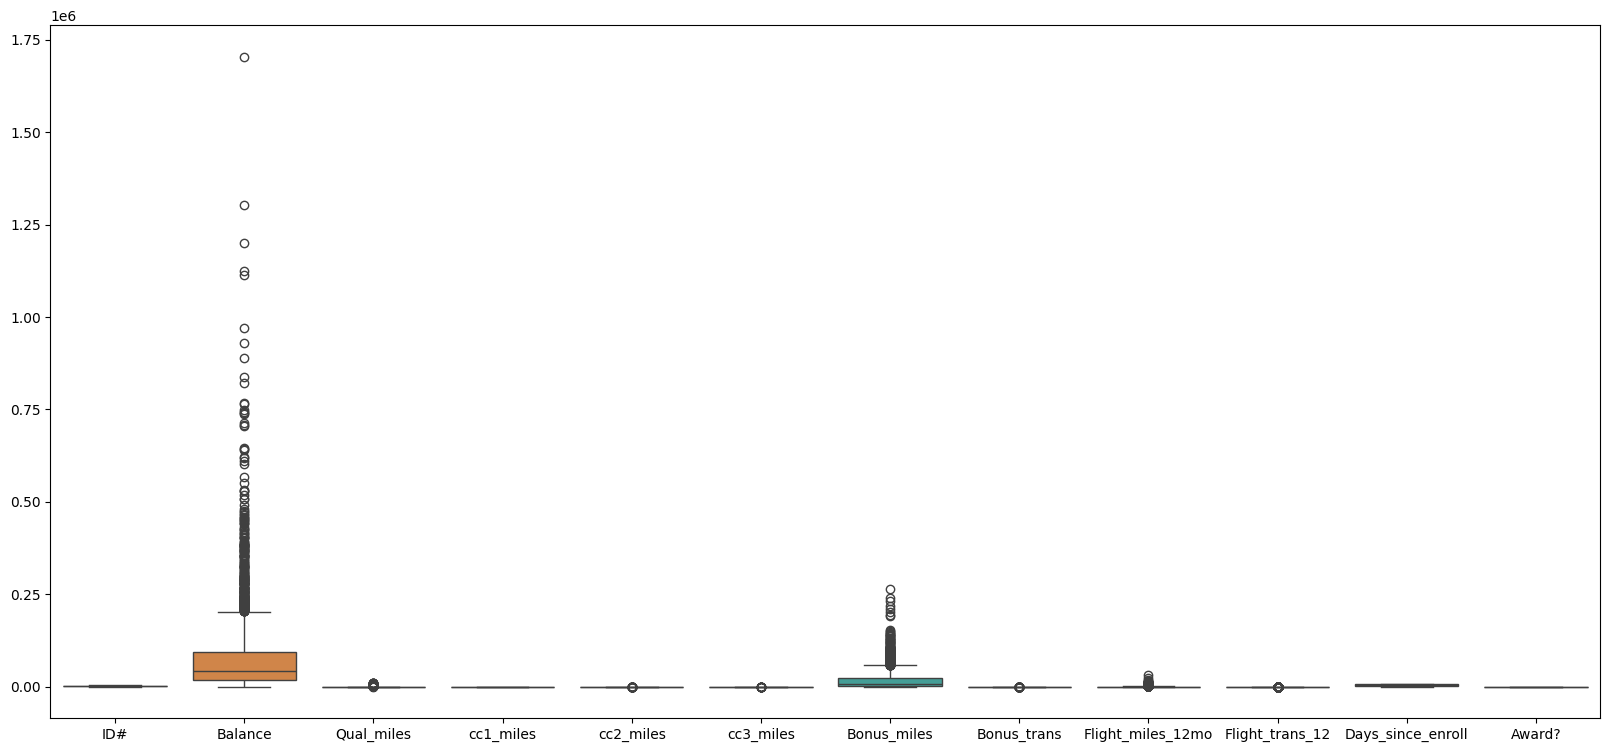

In [86]:
plt.figure(figsize = (20,9))
ax=sns.boxplot(data=airline)

C:\Users\Admin\AppData\Local\Temp\ipykernel_35632\2356895178.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Balance',data=outlier,palette='crest',ax=axes[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_35632\2356895178.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Qual_miles',data=outlier,palette='crest',ax=axes[1])
C:\Users\Admin\AppData\Local\Temp\ipykernel_35632\2356895178.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cc1_miles',data=outlier,palette='crest',ax=axes[2])
C:\Users\Admin\AppData\Local\Temp\ipykernel_

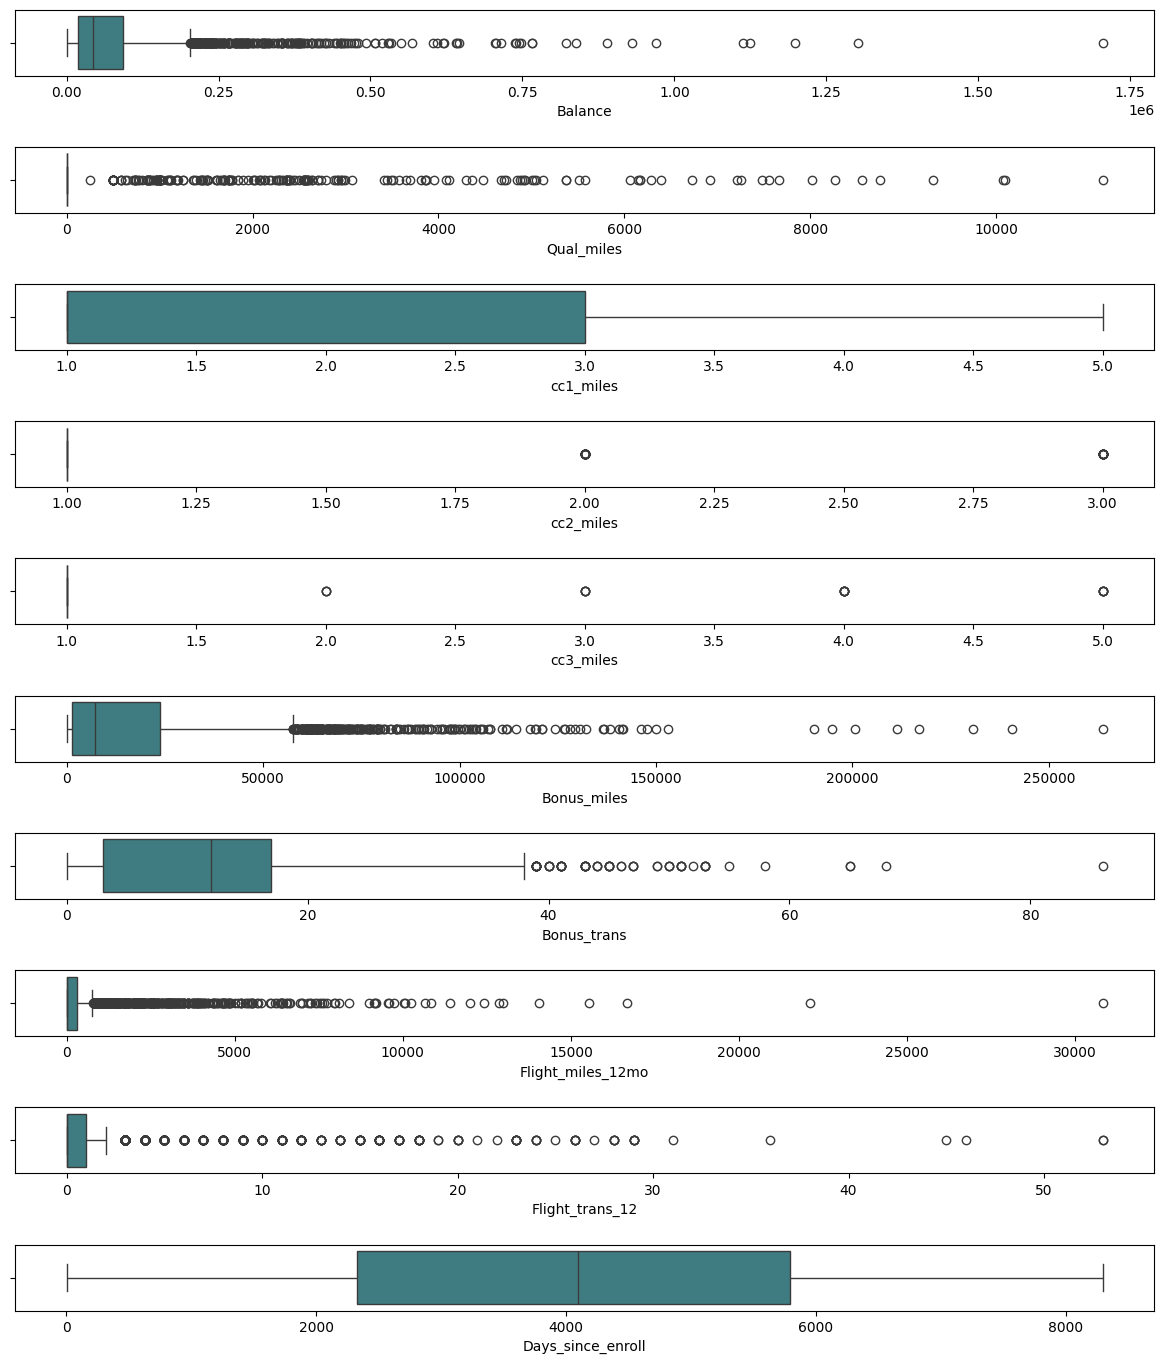

In [25]:
outlier = airline.copy() 
fig, axes=plt.subplots(10,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=outlier,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

<Axes: >

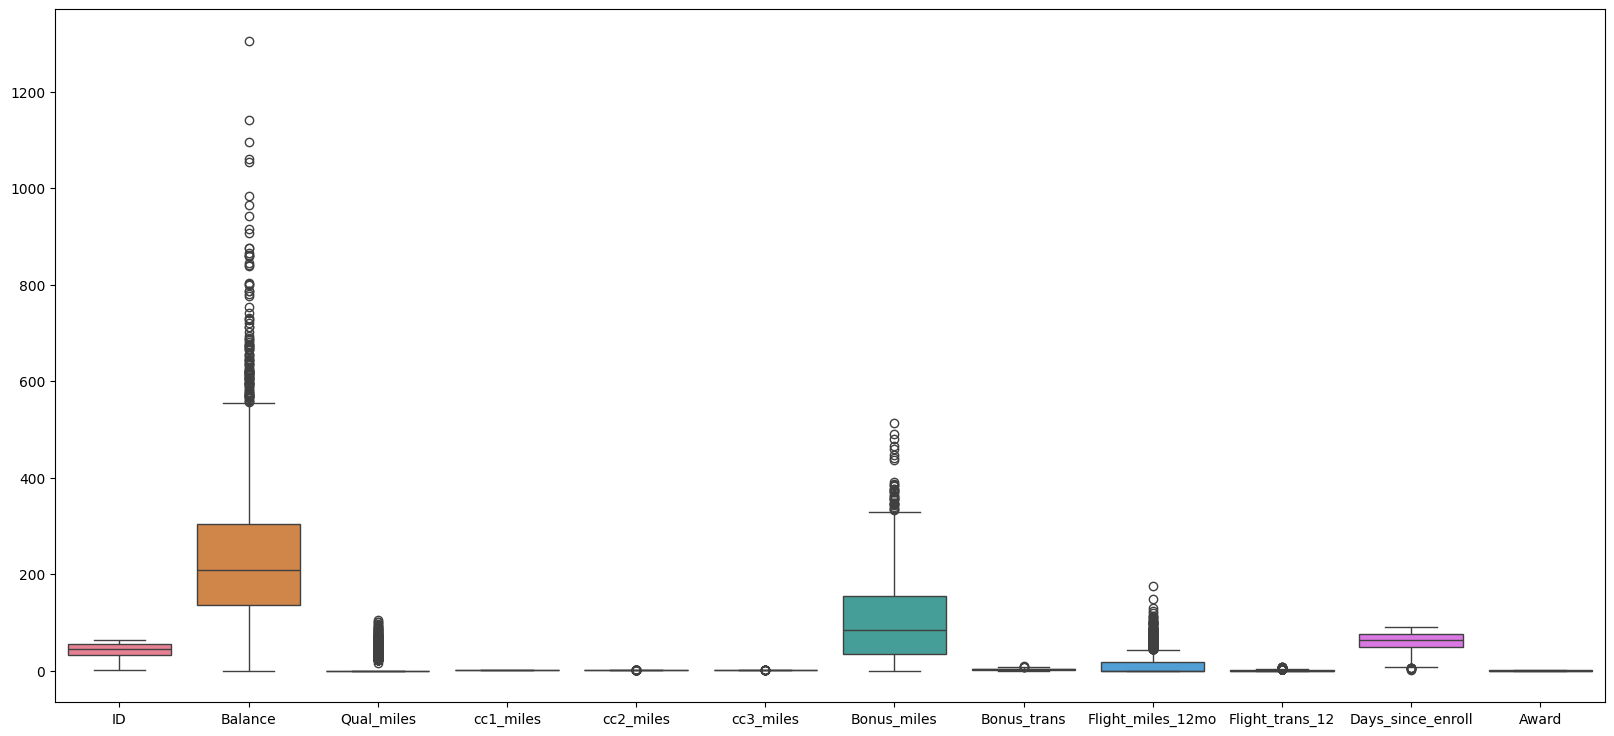

In [37]:
plt.figure(figsize=(20,9))
sns.boxplot(data=np.sqrt(airline))

In [39]:
countNotermdeposit = len(airline[airline.Flight_trans_12 == 0])
countHavetermdeposit = len(airline[airline.Flight_trans_12 == 1])
print("Percentage of Customer doesn't have a Flight_trans_12: {:.2f}%".format((countNotermdeposit / (len(airline.Flight_trans_12))*100)))
print("Percentage of Customer does have a Flight_trans_12: {:.2f}%".format((countHavetermdeposit / (len(airline.Flight_trans_12))*100)))

Percentage of Customer doesn't have a Flight_trans_12: 68.09%
Percentage of Customer does have a Flight_trans_12: 11.73%


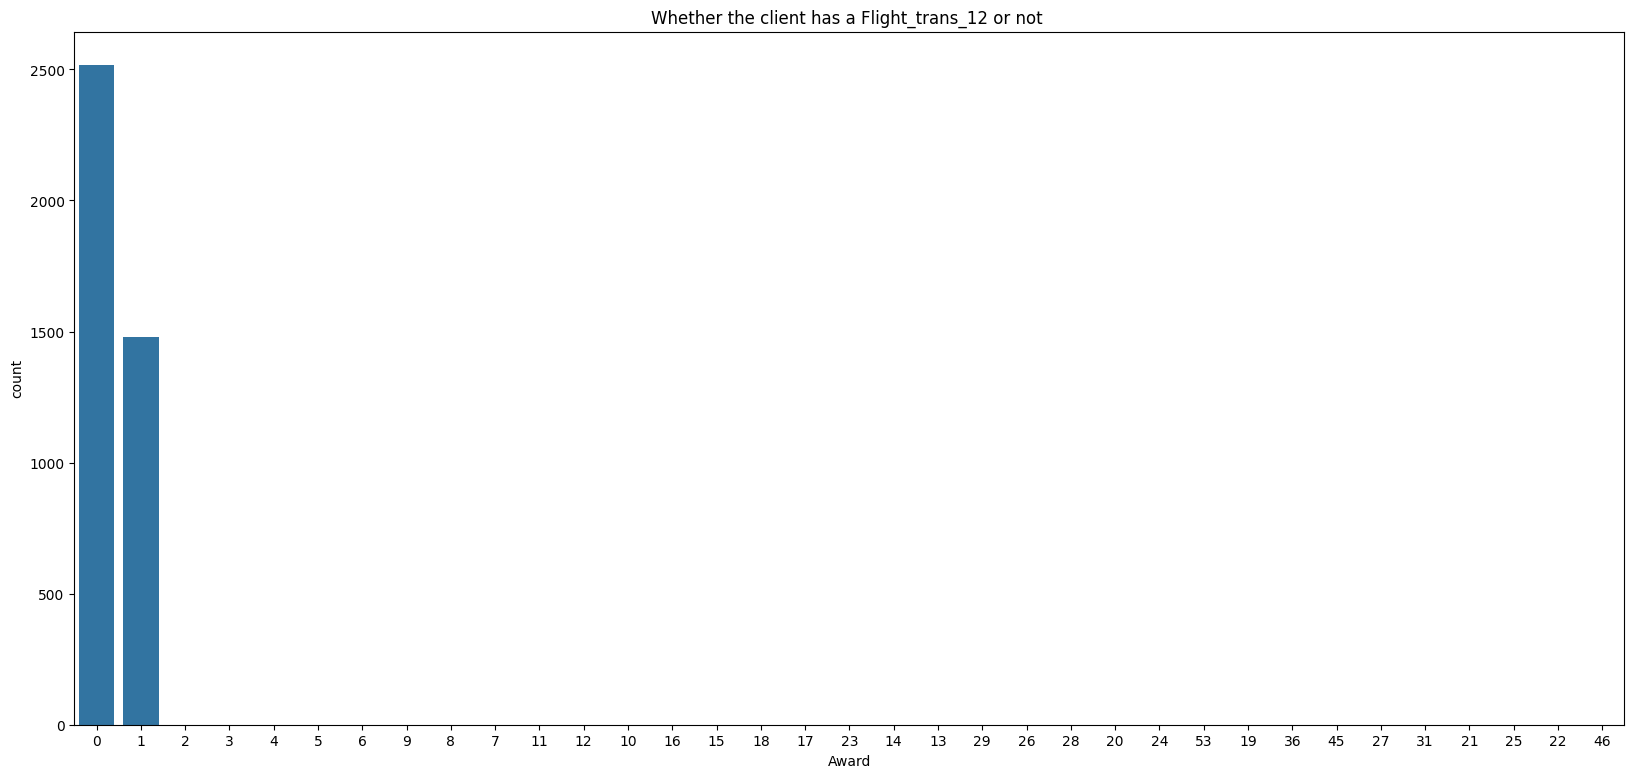

In [41]:
plt.figure(figsize = (20,9))
sns.countplot(x='Award', data=airline, order=airline['Flight_trans_12'].value_counts().index)
plt.title('Whether the client has a Flight_trans_12 or not ')
plt.show()

In [42]:
corr = airline.corr()
corr["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
ID                  -0.243737
Name: Balance, dtype: float64

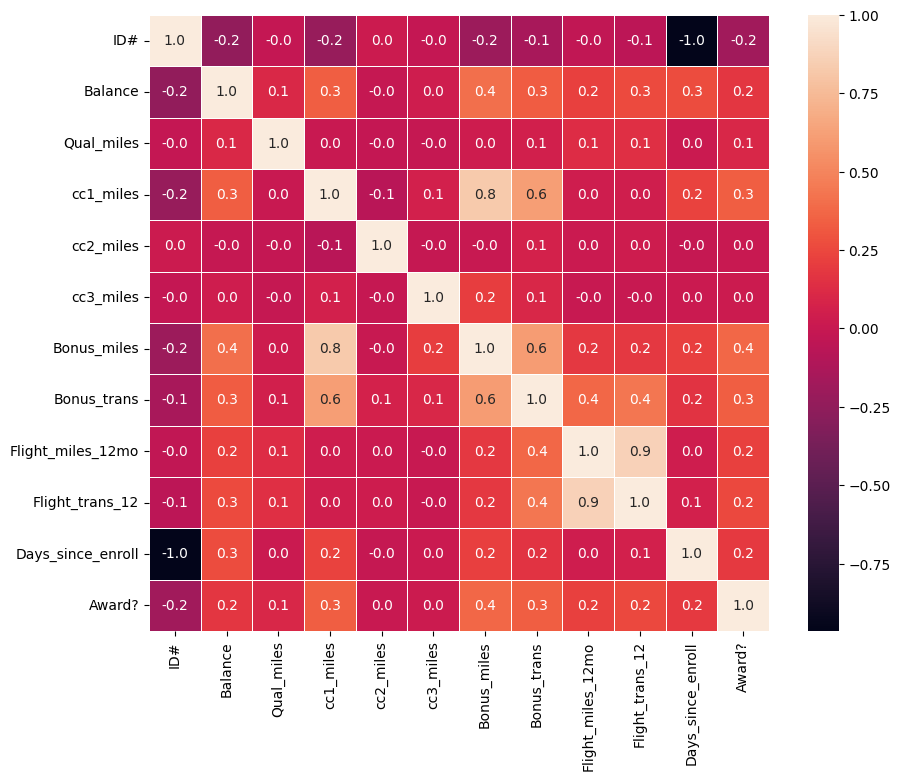

In [30]:
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(airline.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

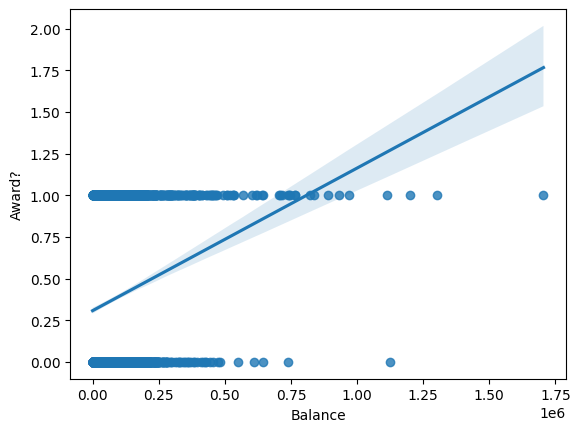

In [17]:
sns.regplot(data=airline, x="Balance", y="Award?")
plt.show()

In [ ]:
sns.scatterplot(data=airline, x="ID#", y="Flight_trans_12")
plt.show()

<Axes: xlabel='cc1_miles', ylabel='Bonus_trans'>

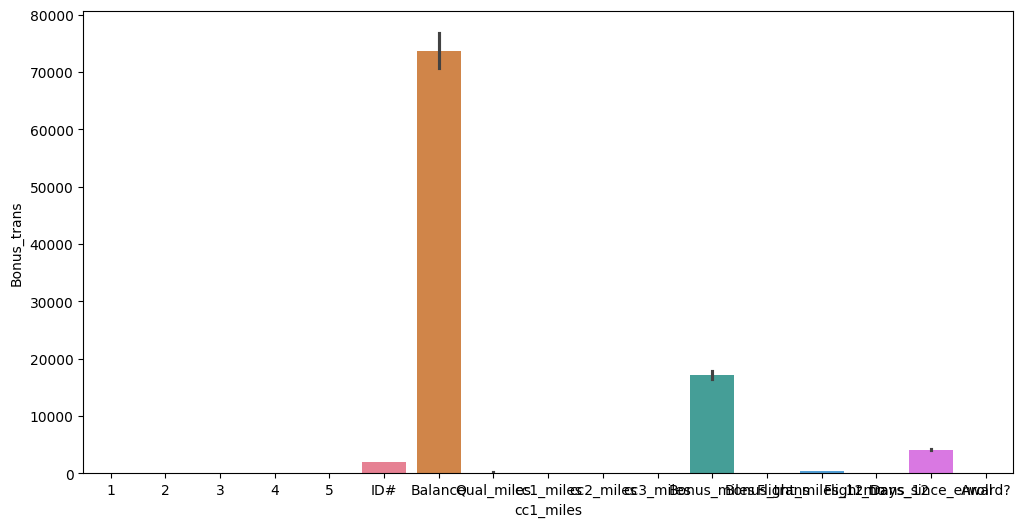

In [31]:
plt.figure(figsize = (12,6))
ax = sns.barplot(airline, x="cc1_miles", y="Bonus_trans")
sns.barplot(airline)

In [ ]:
#Standardized Scaler

In [18]:
scaler = StandardScaler()
std_airline = scaler.fit_transform(airline) 
std_airline.shape

(3999, 12)

In [7]:
minmax = MinMaxScaler()
minmax_airline = scaler.fit_transform(airline) 
minmax_airline.shape

(3999, 12)

In [11]:
from sklearn.cluster import KMeans

In [15]:
cluster_range = range(1,15)

cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_airline)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

,Num_Clusters,Cluster_Errors
0,1,47988.000000
1,2,39018.757375
2,3,34530.845086
3,4,30616.623636
4,5,26894.771760
5,6,23490.745045
6,7,20922.822696
7,8,19330.110303
8,9,18014.260461
9,10,16767.645984


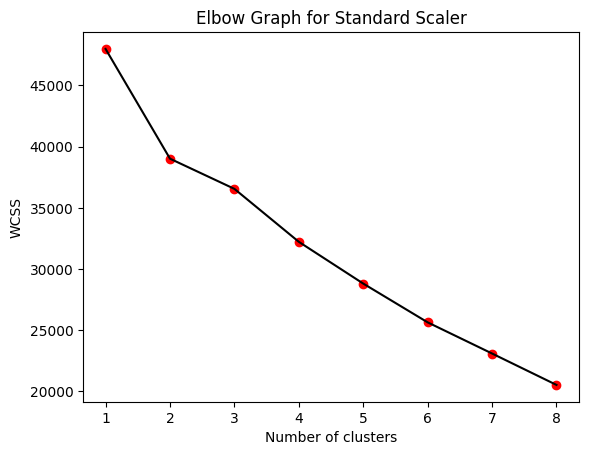

In [19]:
wcss=[]
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_airline)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10]
clusters_inertia = []
s_scores = []

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_airline)
    clusters_inertia.append(KM_est.inertia_)
    silhouette_avg = silhouette_score(std_airline, KM_est.labels_)
    s_scores.append(silhouette_avg)

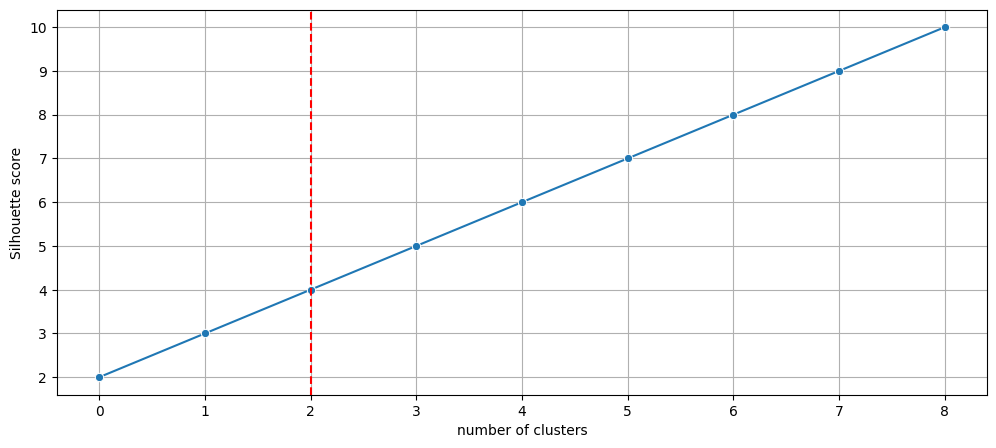

In [92]:
fig,ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, marker='o', ax=ax)
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [47]:
clust_list = [2,3,4,5,6,7,8,9]

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_airline)
    sil_score1= silhouette_score(std_airline, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)
    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2972827954960301
For n_clusters = 3 The average silhouette_score is : 0.2690112341329993
For n_clusters = 4 The average silhouette_score is : 0.21904460491631736
For n_clusters = 5 The average silhouette_score is : 0.22960519564327408
For n_clusters = 6 The average silhouette_score is : 0.24148419473625138
For n_clusters = 7 The average silhouette_score is : 0.2513518807339586
For n_clusters = 8 The average silhouette_score is : 0.2604090085550503
For n_clusters = 9 The average silhouette_score is : 0.25991369082847054


In [53]:
model_kmeans = KMeans(n_clusters=6, random_state=1, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_airline)
y_predict_kmeans.shape

(3999,)

In [42]:
y_predict_kmeans

array([3, 3, 3, ..., 4, 1, 1])

In [43]:
model_kmeans.cluster_centers_

array([[ 4.63801281e-02,  4.55980459e-01,  6.96816326e+00,
        -1.77426620e-02, -9.82418871e-02, -6.27665798e-02,
         8.92195717e-02,  9.07861282e-02,  3.64575351e-01,
         4.14948666e-01, -7.38150937e-02,  3.59325635e-01],
       [ 9.62357964e-01, -3.92943717e-01, -1.34484438e-01,
        -7.18902839e-01,  2.66923558e-02, -6.27665798e-02,
        -5.75105930e-01, -6.26965528e-01, -1.99081839e-01,
        -2.21138000e-01, -9.57669744e-01, -4.56376713e-01],
       [-9.09168838e-01,  9.26469615e-01, -8.24635702e-02,
         1.55042345e+00, -8.63999138e-02,  3.58139906e-01,
         1.57518828e+00,  9.21535806e-01,  3.37283278e-04,
         8.43753082e-03,  9.09347739e-01,  6.70357748e-01],
       [-8.40646205e-01, -1.61669809e-01, -1.11020863e-01,
        -5.06943455e-01,  3.29660302e-02, -5.86321799e-02,
        -4.62976171e-01, -3.78794222e-01, -1.54729365e-01,
        -1.67451927e-01,  8.21433670e-01, -1.88622478e-01],
       [ 5.14530400e-01, -8.57419104e-03, -1.3269166

In [45]:
model_kmeans.labels_

array([3, 3, 3, ..., 4, 1, 1])

In [54]:
airline_df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\EXCELR\Assignments\Clustering\EastWestAirlines.csv")
airline_df['Kmeans_Label'] = model_kmeans.labels_

In [ ]:
airline_df.groupby('Kmeans_Label').agg(['mean'])

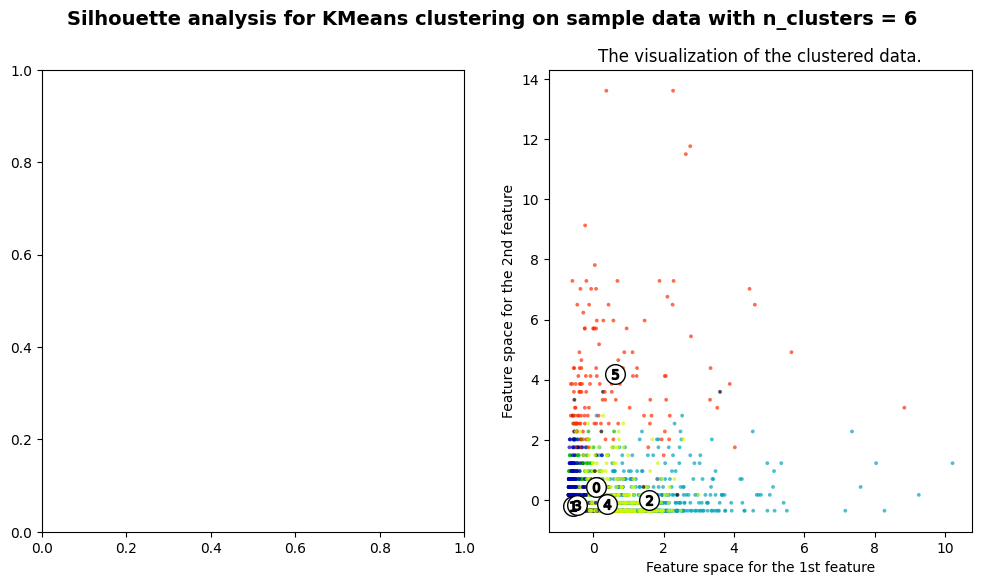

In [61]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(12,6)

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 6) 
ax2.scatter(std_airline[:, 6], std_airline[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

centers1 = model_kmeans.cluster_centers_
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

plt.show()

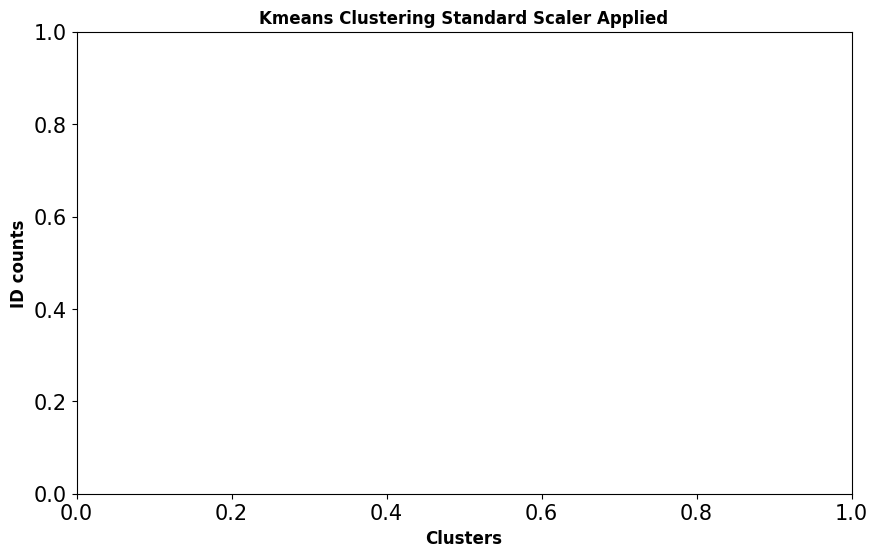

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))
airline_df.groupby
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [80]:
cluster_range = range(1,15)

cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_airline)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

,Num_Clusters,Cluster_Errors
0,1,47988.000000
1,2,39018.802040
2,3,34530.845086
3,4,30616.623636
4,5,26894.771760
5,6,23502.908085
6,7,21884.946370
7,8,19329.964410
8,9,17986.241137
9,10,16850.398548


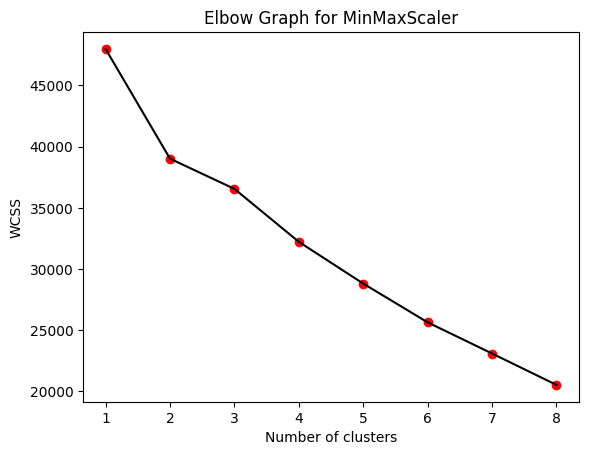

In [81]:
wcss=[]
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_airline)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10]
clusters_inertia = []
s_scores = []

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(minmax_airline)
    clusters_inertia.append(KM_est.inertia_)
    silhouette_avg = silhouette_score(minmax_airline, KM_est.labels_)
    s_scores.append(silhouette_avg)

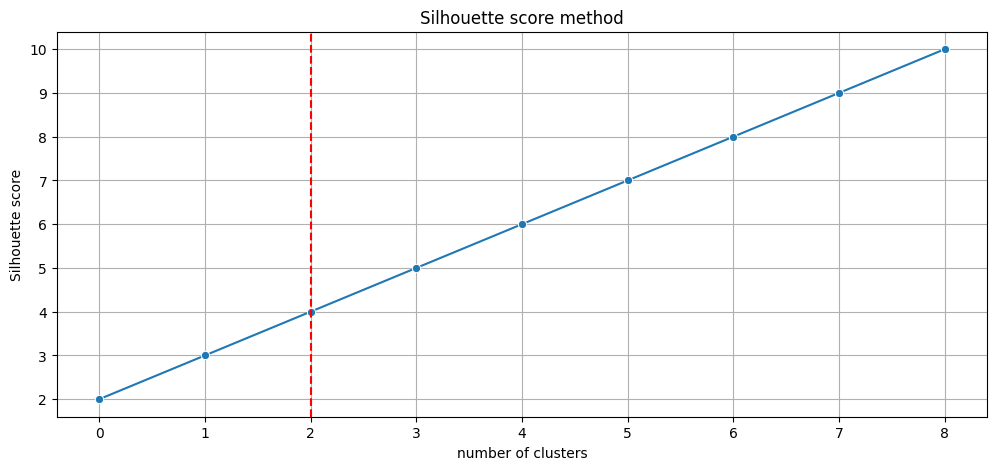

In [93]:
fig,ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [96]:
clust_list = [2,3,4,5,6,7,8,9]

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(airline)
    sil_score1= sil(airline, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.7622049666647472
For n_clusters = 3 The average silhouette_score is : 0.6251052576316739
For n_clusters = 4 The average silhouette_score is : 0.5894340316698657
For n_clusters = 5 The average silhouette_score is : 0.5460034900197288
For n_clusters = 6 The average silhouette_score is : 0.5147223248155344
For n_clusters = 7 The average silhouette_score is : 0.4759140451598414
For n_clusters = 8 The average silhouette_score is : 0.44477448176634155
For n_clusters = 9 The average silhouette_score is : 0.4471474091050181


In [97]:
model_kmeans = KMeans(n_clusters=2, random_state=1, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_airline)
y_predict_kmeans.shape

(3999,)

In [98]:
y_predict_kmeans

array([1, 1, 1, ..., 1, 1, 1])

In [99]:
model_kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [100]:
model_kmeans.cluster_centers_

array([[-0.52116588,  0.59694752,  0.15622447,  1.06515164, -0.03198386,
         0.11068223,  0.96067668,  0.87276206,  0.36412791,  0.39787641,
         0.52878604,  0.67129212],
       [ 0.25941178, -0.2971323 , -0.07776117, -0.53018222,  0.01592006,
        -0.05509239, -0.47817952, -0.43441977, -0.18124569, -0.1980441 ,
        -0.26320474, -0.33413754]])

In [101]:
airline_df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\EXCELR\Assignments\Clustering\EastWestAirlines.csv")
airline_df['Kmeans_Label'] = model_kmeans.labels_

In [102]:
airline_df.groupby('Kmeans_Label').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,
0,1409.586596,133815.485693,265.164157,3.527861,1.009789,1.033886,40370.522590,19.988705,968.019578,2.877259,5211.243976,0.694277
1,2315.736428,43663.326095,83.929614,1.329465,1.016848,1.001498,5597.224261,7.432048,207.500187,0.625983,3575.285286,0.209285


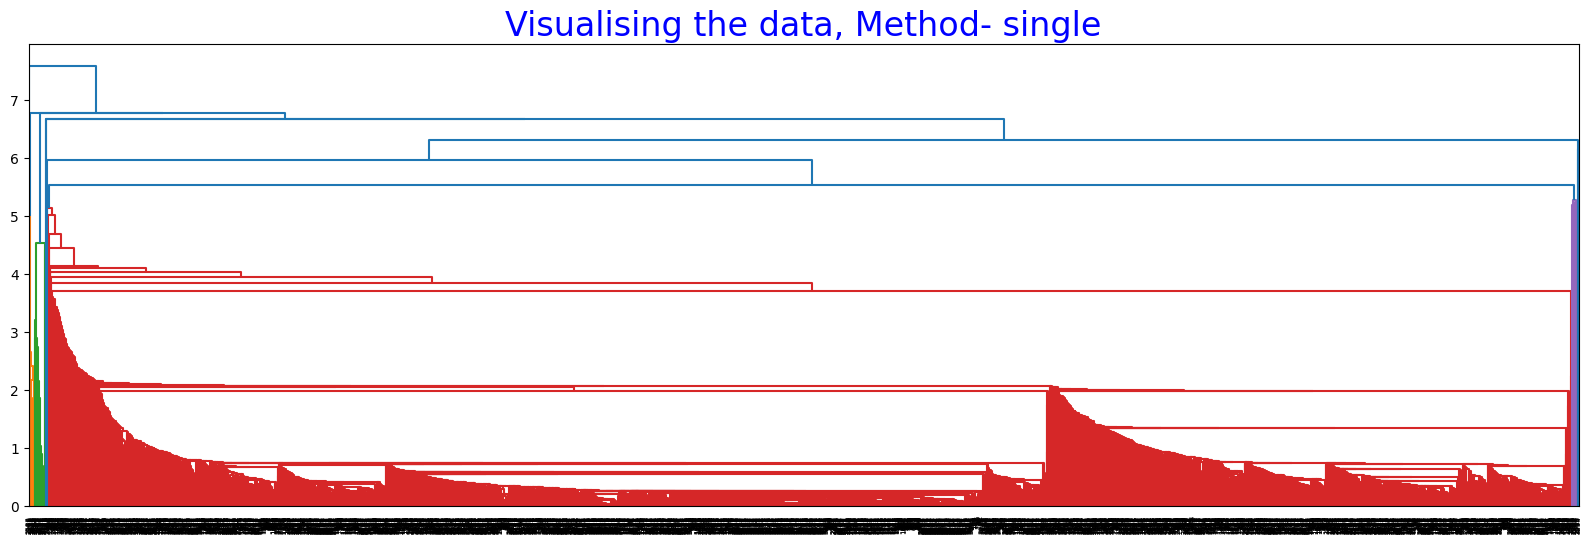

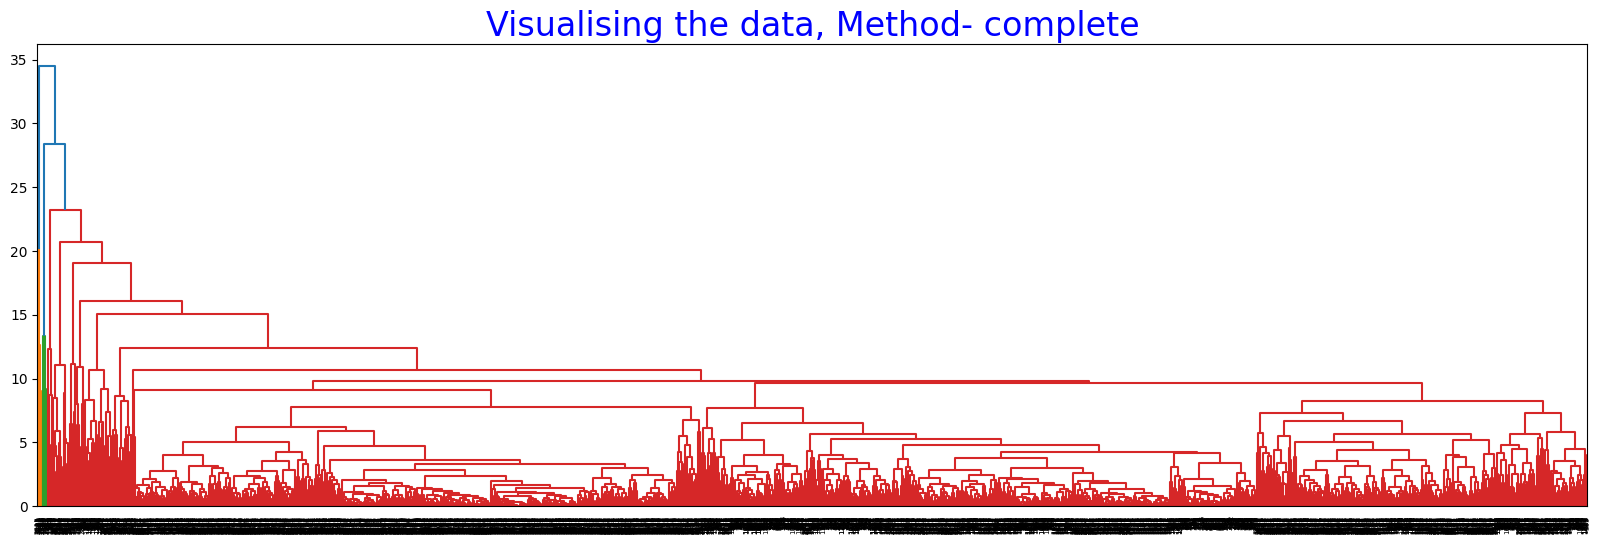

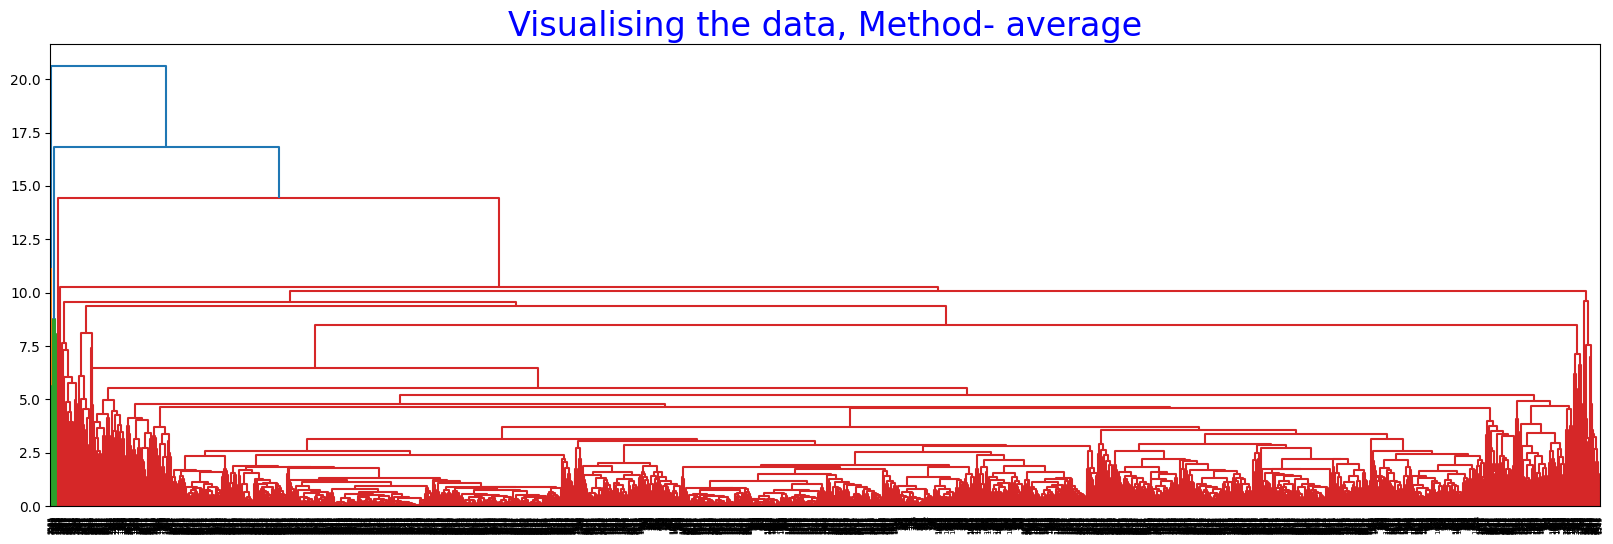

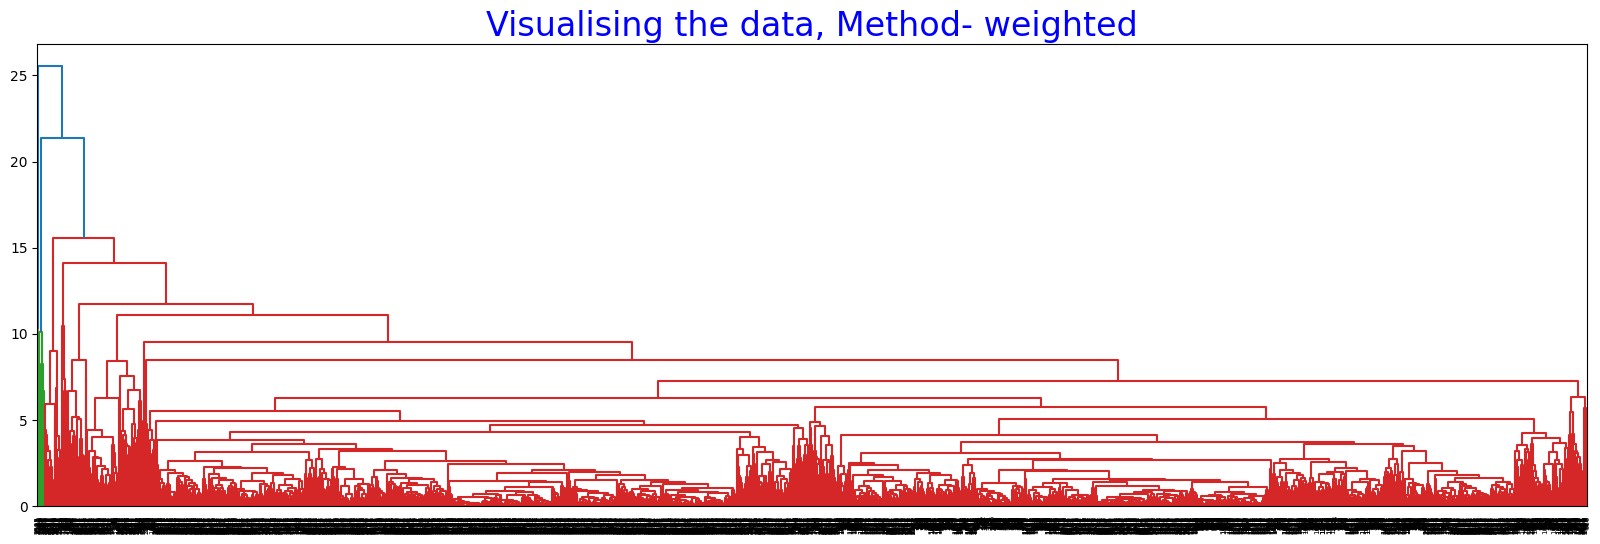

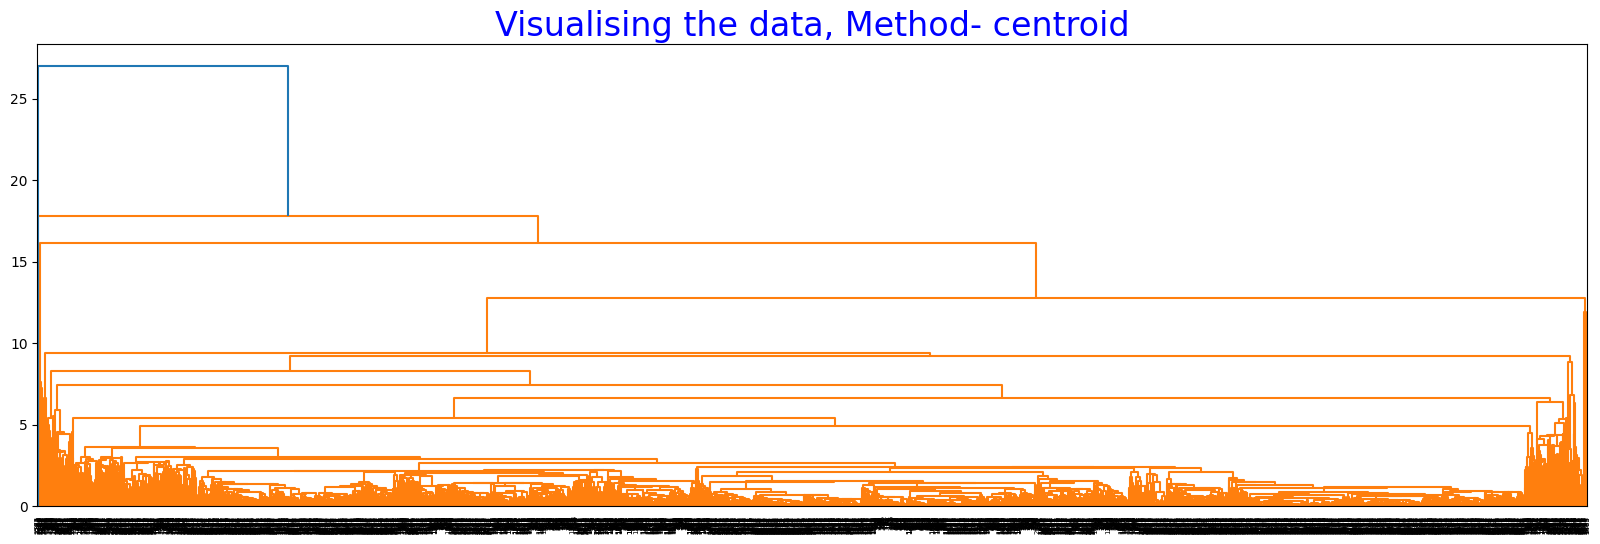

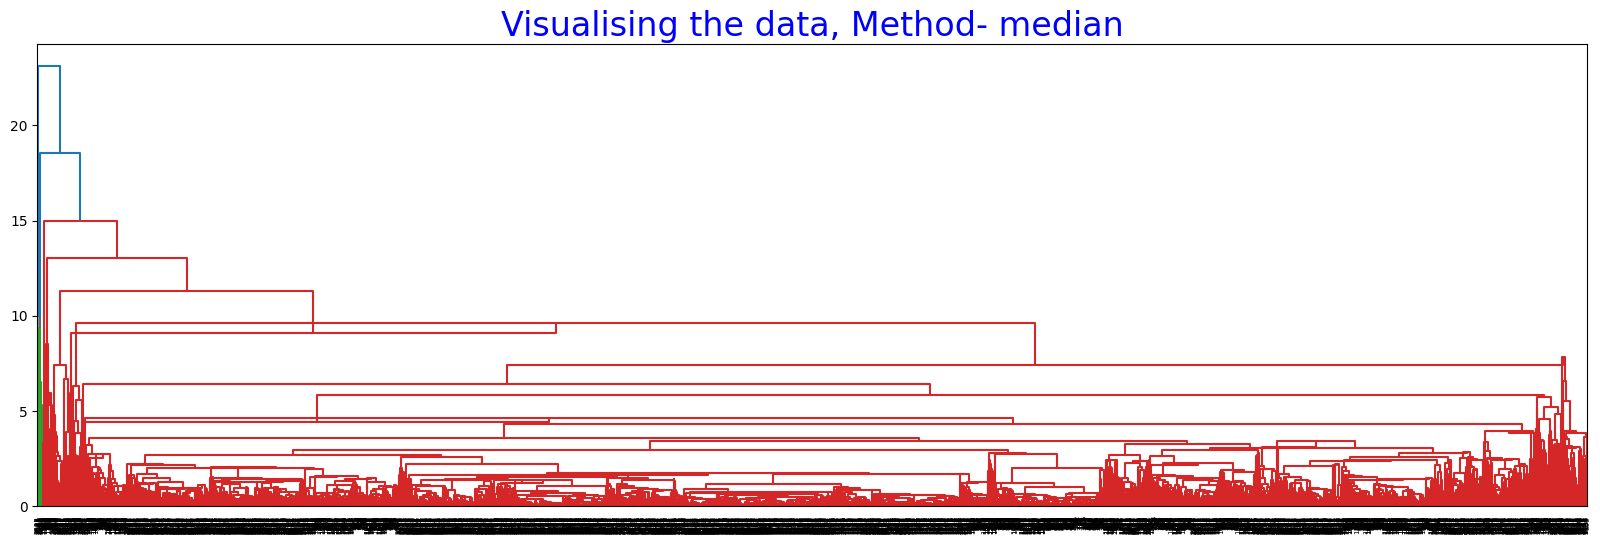

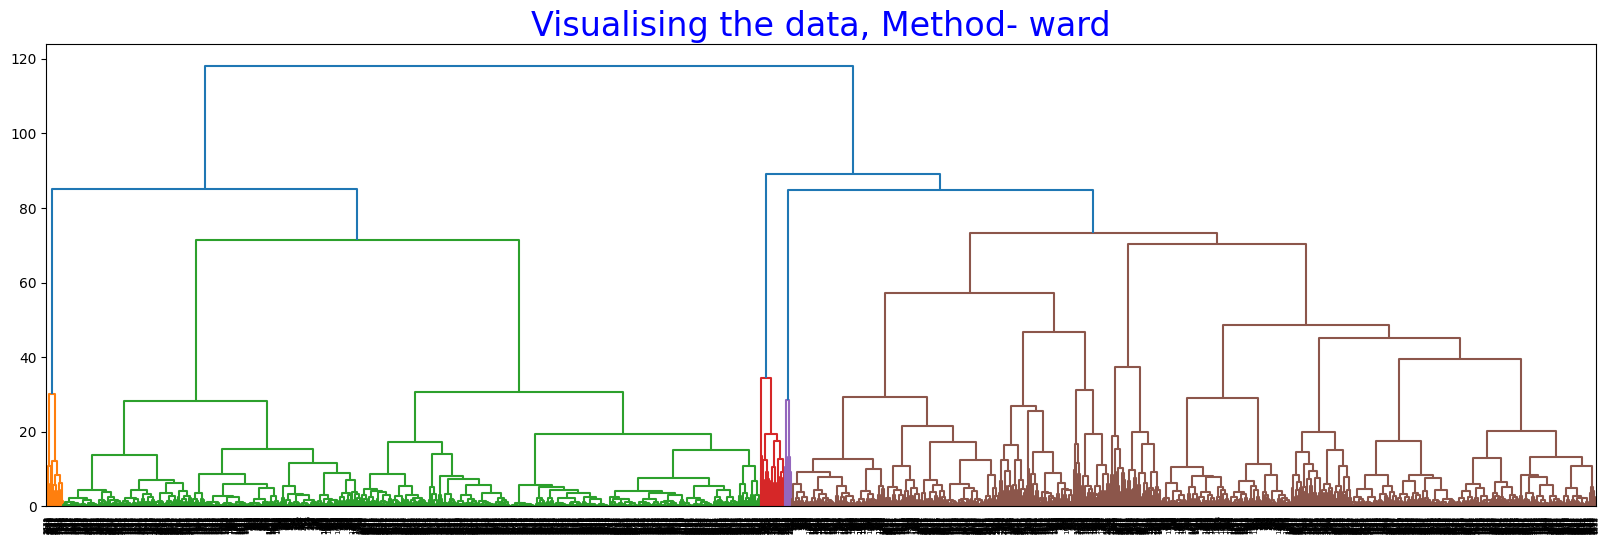

In [107]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_airline, method = methods,optimal_ordering=False))

In [108]:
n_clusters = [2,3,4,5,6,7,8]
for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels1 = hie_cluster1.fit_predict(minmax_airline)
        silhouette_score1 = sil(minmax_airline, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.19528832524711162
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.7147570737481664
For n_clusters = 2 The average silhouette_score with linkage- average : 0.7986913036411657
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8467289842517026

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.20526614352218822
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.719216184295936
For n_clusters = 3 The average silhouette_score with linkage- average : 0.760749640995539
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7172162983311359

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.21135914614865942
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6276977845234434
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7192609312303987
For 

In [110]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(airline)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [112]:
agg_clustering

AgglomerativeClustering()

In [116]:
(silhouette_score(airline, agg_clustering.labels_)*100)

72.56024379067097

In [118]:
#DBSCAN

In [36]:
from itertools import product

eps_values = np.arange(0.25,3,0.25)
min_samples = np.arange(3,23)
DBSCAN_params = list(product(eps_values, min_samples))

In [37]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_airline)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_airline, DBS_clustering.labels_))

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


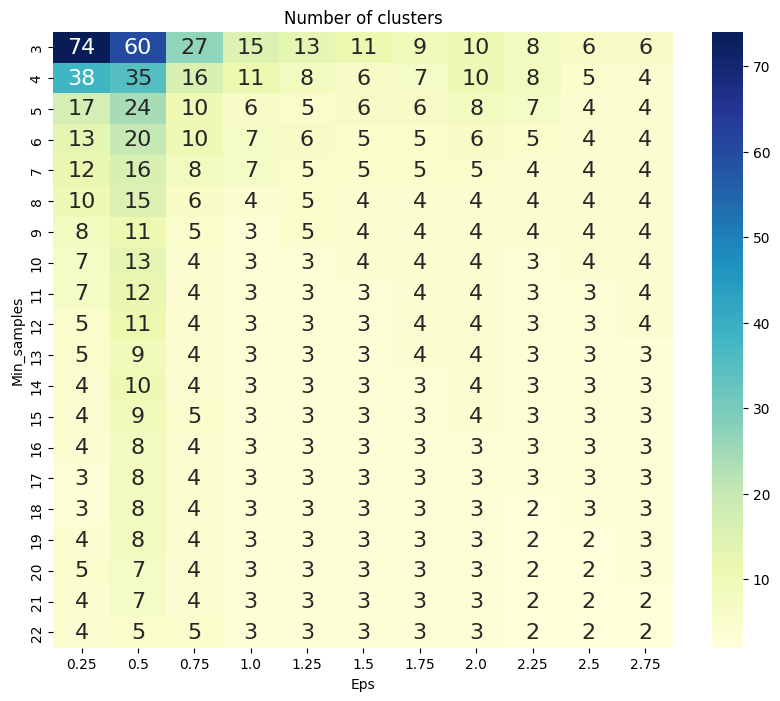

In [30]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

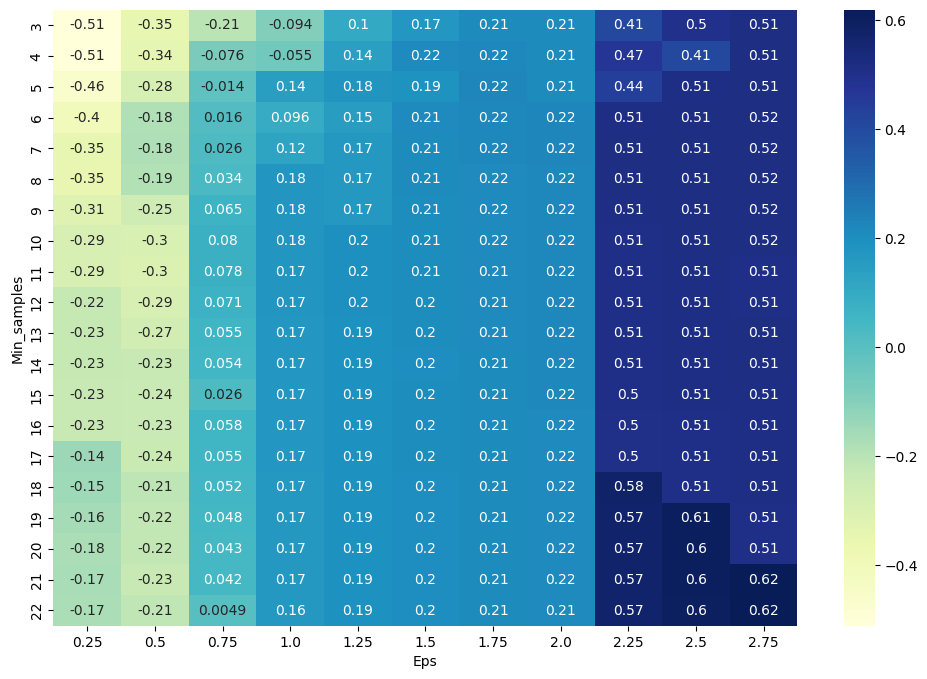

In [122]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [123]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_airline)
         
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(std_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.75 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6192


In [124]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_airline)

DBSCAN(eps=2.5, min_samples=21)

In [127]:
airline['DBSCAN_Labels'] = dbscan.labels_
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DBSCAN_Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


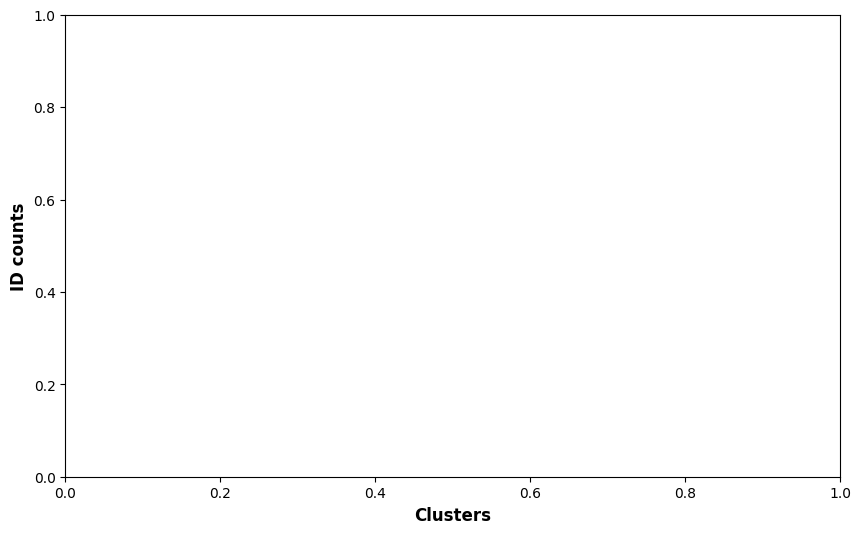

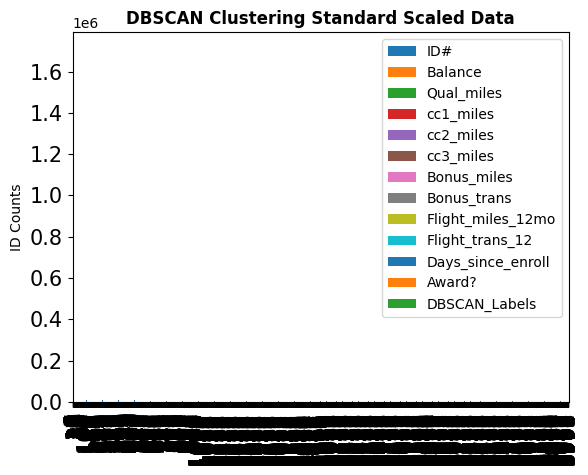

In [135]:
fig, ax = plt.subplots(figsize=(10, 6))
airline.plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [136]:
from itertools import product

eps_values = np.arange(0.25,1.25,0.25)
min_samples = np.arange(3,23)
DBSCAN_params = list(product(eps_values, min_samples))

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


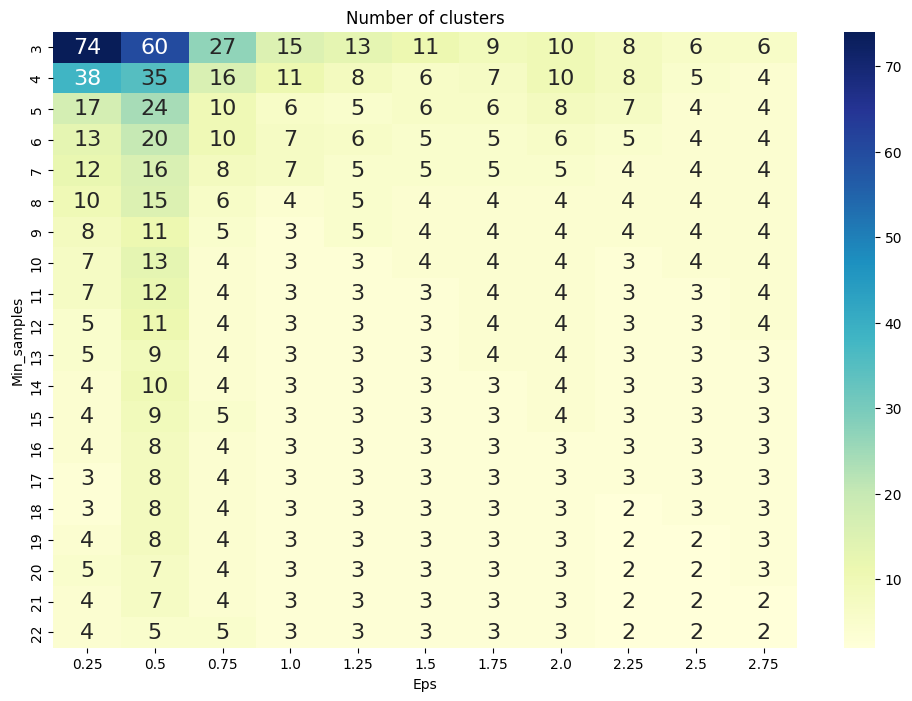

In [31]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

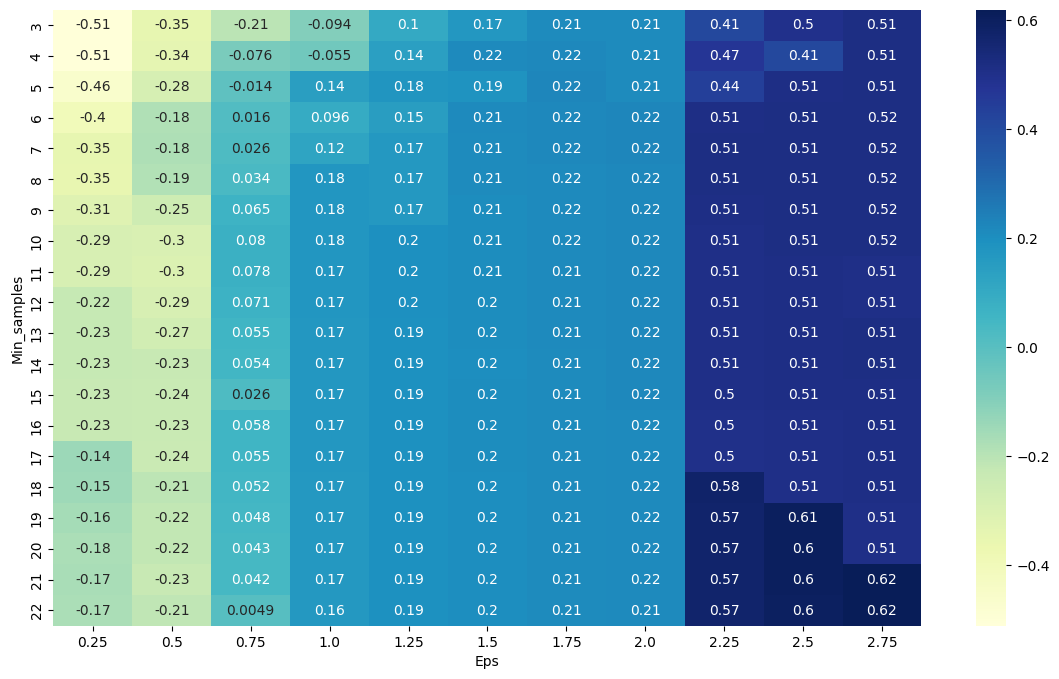

In [32]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [139]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_airline)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.1740


In [ ]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_airline)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(minmax_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

In [144]:
dbscan = DBSCAN(eps=1, min_samples=22) 
dbscan.fit(minmax_airline)

DBSCAN(eps=1, min_samples=22)

In [143]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)